In [31]:
import pandas as pd
import numpy as np
# Load the data into a Pandas dataframe
df = pd.read_csv('Textile- STOCK_MARKET_DATA.csv')
# Define column names
df.iloc[1:]


,Company Name,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. cr)
1,KPR Mill,574.8,-2.95,704,479.55,"19,647.47"
2,Trident,30.35,1.68,58,29.35,"15,466.23"
3,Raymond,"1,270.20",1.16,"1,644.00",645,"8,456.20"
4,Swan Energy,253.2,-0.10,379,155,"6,682.38"
5,Welspun India,66.4,NaN,112.05,62.3,"6,560.71"
...,...,...,...,...,...,...
95,Amarjothi Spin,180.4,0.56,209.95,144,121.77
96,KG Petrochem,199,5.29,NaN,178.05,115.72
97,Virat Ind,234.9,2.24,282.6,125.3,115.65
98,Vippy Spinpro,188.25,-4.13,217.7,91.1,110.5


In [62]:
df.isnull().sum()

Last Price             0
% Change               4
52 wk High             8
52 wk Low              3
Market Cap (Rs. cr)    0
dtype: int64

In [2]:
# Drop rows containing missing values
df = df.dropna()
df.iloc[1:14]


,Company Name,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. cr)
1,KPR Mill,574.8,-2.95,704,479.55,"19,647.47"
2,Trident,30.35,1.68,58,29.35,"15,466.23"
3,Raymond,"1,270.20",1.16,"1,644.00",645,"8,456.20"
4,Swan Energy,253.2,-0.10,379,155,"6,682.38"
6,Alok Industries,12.47,-2.96,29.8,10.07,"6,191.65"
8,Garware Technic,"2,953.00",0.27,"3,752.55","2,611.20","6,017.67"
10,PDS,325.25,-1.02,414.84,282,"4,257.36"
12,Indo Count,128.95,0.27,189.4,119.7,"2,553.91"
13,Kewal Kiran,394,4.65,592.35,178.5,"2,428.03"
15,Arvind,83,1.34,138.5,77.7,"2,170.43"


In [3]:
df.head()  # Displays the first few rows of the DataFrame


,Company Name,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. cr)
0,Page Industries,"38,014.85",0.64,"54,262.30","37,138.95","42,401.28"
1,KPR Mill,574.8,-2.95,704,479.55,"19,647.47"
2,Trident,30.35,1.68,58,29.35,"15,466.23"
3,Raymond,"1,270.20",1.16,"1,644.00",645,"8,456.20"
4,Swan Energy,253.2,-0.10,379,155,"6,682.38"


In [4]:
df.tail()  # Displays the last few rows of the DataFrame


,Company Name,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. cr)
94,Salona Cotspin,233.9,4.56,332.95,182,123.09
95,Amarjothi Spin,180.4,0.56,209.95,144,121.77
97,Virat Ind,234.9,2.24,282.6,125.3,115.65
98,Vippy Spinpro,188.25,-4.13,217.7,91.1,110.5
99,Premco Global,331.1,-2.10,492.95,290.55,109.42


In [5]:
df.sort_values('Last Price')

,Company Name,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. cr)
38,Cheviot Company,"1,088.00",-0.26,"1,485.00","1,051.00",654.64
3,Raymond,"1,270.20",1.16,"1,644.00",645,"8,456.20"
30,Ambika Cotton,"1,441.00",-0.59,"2,664.90","1,324.45",824.97
92,Indian Acrylics,10.03,-3.74,17.65,10,135.73
68,Digjam,103,1.98,219,87,206
...,...,...,...,...,...,...
65,MK Exim,84.15,0.18,119.7,66.3,226.46
49,Nahar Ent,84.8,-1.05,238,84.05,337.8
18,Ganesha Ecosph,891.25,1.58,985.05,543.25,"1,945.55"
63,Zodiac Clothing,90.3,-2.38,129.9,78.55,234.72


In [6]:
df.shape
# df[1].value_counts()

(86, 6)

In [7]:
df.describe()

,% Change
count,86.000000
mean,0.283372
std,2.576751
min,-4.970000
25%,-1.155000
50%,0.225000
75%,1.827500
max,10.560000


# Replace Missing Values With Median

In [63]:
for col in df.columns[1:]:
    # Check if the column contains string values
    if df[col].dtype == 'object':
        # Remove commas from the string values
        df[col] = df[col].str.replace(',', '').astype(float)
    
    # Calculate the median of the column
    fill_value = df[col].median()
    
    # Replace missing values with the median
    df[col].fillna(fill_value, inplace=True)

print("After replacing with median")
df

After replacing with median


,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. cr)
0,"38,014.85",0.64,54262.300,37138.95,42401.28
1,574.8,-2.95,704.000,479.55,19647.47
2,30.35,1.68,58.000,29.35,15466.23
3,"1,270.20",1.16,1644.000,645.00,8456.20
4,253.2,-0.10,379.000,155.00,6682.38
...,...,...,...,...,...
95,180.4,0.56,209.950,144.00,121.77
96,199,5.29,213.825,178.05,115.72
97,234.9,2.24,282.600,125.30,115.65
98,188.25,-4.13,217.700,91.10,110.50


In [9]:
# Check for missing values
print(df.isnull().sum())
df.shape


Company Name           0
Last Price             0
% Change               0
52 wk High             0
52 wk Low              0
Market Cap (Rs. cr)    0
dtype: int64


(86, 6)

# Replace Missing Values With mean


In [10]:
for col in df.columns[1:]:
    # Check if the column contains string values
    if df[col].dtype == 'object':
        # Remove commas from the string values
        df[col] = df[col].str.replace(',', '').astype(float)
    
    # Calculate the mean of the column
    fill_value = df[col].mean()
    
    # Replace missing values with the mean
    df[col].fillna(fill_value, inplace=True)

print("After replacing with mean")
df


After replacing with mean


,Company Name,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. cr)
0,Page Industries,38014.85,0.64,54262.30,37138.95,42401.28
1,KPR Mill,574.80,-2.95,704.00,479.55,19647.47
2,Trident,30.35,1.68,58.00,29.35,15466.23
3,Raymond,1270.20,1.16,1644.00,645.00,8456.20
4,Swan Energy,253.20,-0.10,379.00,155.00,6682.38
...,...,...,...,...,...,...
94,Salona Cotspin,233.90,4.56,332.95,182.00,123.09
95,Amarjothi Spin,180.40,0.56,209.95,144.00,121.77
97,Virat Ind,234.90,2.24,282.60,125.30,115.65
98,Vippy Spinpro,188.25,-4.13,217.70,91.10,110.50


# Normailization

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the data
df[df.columns[1:]] = scaler.fit_transform(df[df.columns[1:]])

print("After feature scaling")
df


After feature scaling


,Company Name,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. cr)
0,Page Industries,1.000000,0.361236,1.000000,1.000000,1.000000
1,KPR Mill,0.015061,0.130071,0.012878,0.012867,0.461981
2,Trident,0.000738,0.428203,0.000971,0.000745,0.363115
3,Raymond,0.033355,0.394720,0.030203,0.017322,0.197361
4,Swan Energy,0.006601,0.313587,0.006888,0.004128,0.155419
...,...,...,...,...,...,...
94,Salona Cotspin,0.006093,0.613651,0.006039,0.004855,0.000323
95,Amarjothi Spin,0.004686,0.356085,0.003772,0.003832,0.000292
97,Virat Ind,0.006119,0.464263,0.005111,0.003328,0.000147
98,Vippy Spinpro,0.004892,0.054089,0.003915,0.002408,0.000026


In [12]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the data
df[df.columns[1:]] = scaler.fit_transform(df[df.columns[1:]])

print("After normalization")
df


After normalization


,Company Name,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. cr)
0,Page Industries,1.000000,0.361236,1.000000,1.000000,1.000000
1,KPR Mill,0.015061,0.130071,0.012878,0.012867,0.461981
2,Trident,0.000738,0.428203,0.000971,0.000745,0.363115
3,Raymond,0.033355,0.394720,0.030203,0.017322,0.197361
4,Swan Energy,0.006601,0.313587,0.006888,0.004128,0.155419
...,...,...,...,...,...,...
94,Salona Cotspin,0.006093,0.613651,0.006039,0.004855,0.000323
95,Amarjothi Spin,0.004686,0.356085,0.003772,0.003832,0.000292
97,Virat Ind,0.006119,0.464263,0.005111,0.003328,0.000147
98,Vippy Spinpro,0.004892,0.054089,0.003915,0.002408,0.000026


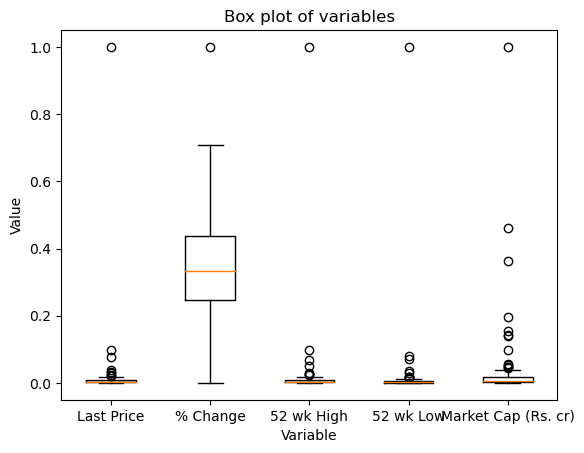

In [13]:
import matplotlib.pyplot as plt

# Create a box plot of the dataframe
plt.boxplot(df[df.columns[1:]], labels=df.columns[1:])

# Add labels and title to the plot
plt.xlabel("Variable")
plt.ylabel("Value")
plt.title("Box plot of variables")

# Show the plot
plt.show()


# Standardization

In [14]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the data
df[df.columns[1:]] = scaler.fit_transform(df[df.columns[1:]])

print("After standardization")
df


After standardization


,Company Name,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. cr)
0,Page Industries,9.136618,0.139214,9.138926,9.158694,7.669936
1,KPR Mill,-0.038699,-1.262185,-0.064950,-0.046398,3.374857
2,Trident,-0.172126,0.545190,-0.175964,-0.159442,2.585594
3,Raymond,0.131720,0.342202,0.096587,-0.004854,1.262359
4,Swan Energy,-0.117513,-0.149654,-0.120800,-0.127892,0.927527
...,...,...,...,...,...,...
94,Salona Cotspin,-0.122242,1.669432,-0.128714,-0.121112,-0.310624
95,Amarjothi Spin,-0.135353,0.107985,-0.149851,-0.130654,-0.310873
97,Virat Ind,-0.121997,0.763793,-0.137367,-0.135349,-0.312029
98,Vippy Spinpro,-0.133430,-1.722812,-0.148520,-0.143937,-0.313001


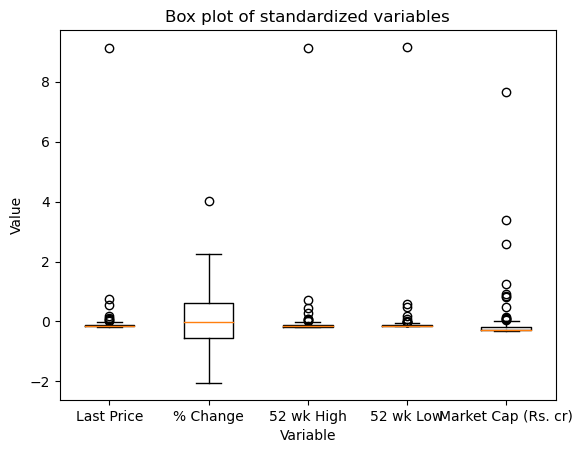

In [15]:
# Create a box plot of the standardized dataframe
plt.boxplot(df[df.columns[1:]], labels=df.columns[1:])

# Add labels and title to the plot
plt.xlabel("Variable")
plt.ylabel("Value")
plt.title("Box plot of standardized variables")

# Show the plot
plt.show()


In [16]:
# splitting the data into X --> (independent variable) and Y --> (dependent variables)

#dependent variable

Y = df.iloc[:,0:1]
Y


,Company Name
0,Page Industries
1,KPR Mill
2,Trident
3,Raymond
4,Swan Energy
...,...
94,Salona Cotspin
95,Amarjothi Spin
97,Virat Ind
98,Vippy Spinpro


In [17]:
X = df.iloc[:,1:10]
X

,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. cr)
0,9.136618,0.139214,9.138926,9.158694,7.669936
1,-0.038699,-1.262185,-0.064950,-0.046398,3.374857
2,-0.172126,0.545190,-0.175964,-0.159442,2.585594
3,0.131720,0.342202,0.096587,-0.004854,1.262359
4,-0.117513,-0.149654,-0.120800,-0.127892,0.927527
...,...,...,...,...,...
94,-0.122242,1.669432,-0.128714,-0.121112,-0.310624
95,-0.135353,0.107985,-0.149851,-0.130654,-0.310873
97,-0.121997,0.763793,-0.137367,-0.135349,-0.312029
98,-0.133430,-1.722812,-0.148520,-0.143937,-0.313001


In [18]:
# one Hot Encoding for column M/F - (taking care of Categorical variables)

new_X = pd.get_dummies(X, drop_first=True)
new_X

,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. cr)
0,9.136618,0.139214,9.138926,9.158694,7.669936
1,-0.038699,-1.262185,-0.064950,-0.046398,3.374857
2,-0.172126,0.545190,-0.175964,-0.159442,2.585594
3,0.131720,0.342202,0.096587,-0.004854,1.262359
4,-0.117513,-0.149654,-0.120800,-0.127892,0.927527
...,...,...,...,...,...
94,-0.122242,1.669432,-0.128714,-0.121112,-0.310624
95,-0.135353,0.107985,-0.149851,-0.130654,-0.310873
97,-0.121997,0.763793,-0.137367,-0.135349,-0.312029
98,-0.133430,-1.722812,-0.148520,-0.143937,-0.313001


In [49]:
#Split the dataset into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(new_X, Y, test_size=0.3, random_state=2)  #30% of the data is set aside for testing

In [50]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()

X_train = std_scl.fit_transform(X_train)    
X_test = std_scl.transform(X_test)         

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
LRC=LogisticRegression()
LRC.fit(X_train,Y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [36]:
Y_pred=LRC.predict(X_test)
Y_pred

array(['PDS', 'Lakshmi Mills', 'Integra Essenti', 'Ruby Mills',
       'Nandan Denim', 'Integra Essenti', 'Arvind', 'Loyal Textiles',
       'Ruby Mills', 'Ruby Mills', 'Reliance Chemo', 'Integra Essenti',
       'RRIL', 'Mallcom (India)', 'Rupa and Comp', 'Jasch Ind',
       'Pasupati Acrylo', 'Filatex Fashion', 'Trident', 'Ganesha Ecosph',
       'JCT', 'Loyal Textiles', 'Sangam India', 'Filatex Fashion',
       'Mallcom (India)', 'Kewal Kiran'], dtype=object)

In [45]:
df.shape

(86, 6)

In [37]:
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(Y_test,Y_pred)
print(cm_lr)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
DTC=DecisionTreeClassifier(criterion='entropy')
DTC.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [42]:
Y_pred1=DTC.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(Y_test,Y_pred1)
print(cm1)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [44]:
from sklearn.metrics import accuracy_score
cm_score1=accuracy_score(Y_test,Y_pred1)
print(cm_score1*100)

0.0


In [21]:
############################

In [24]:
import seaborn as sns

                     Last Price  % Change  52 wk High  52 wk Low  \
Last Price             1.000000  0.020336    0.999632   0.999652   
% Change               0.020336  1.000000    0.016207   0.016843   
52 wk High             0.999632  0.016207    1.000000   0.999509   
52 wk Low              0.999652  0.016843    0.999509   1.000000   
Market Cap (Rs. cr)    0.837246 -0.025309    0.834725   0.836192   

                     Market Cap (Rs. cr)  
Last Price                      0.837246  
% Change                       -0.025309  
52 wk High                      0.834725  
52 wk Low                       0.836192  
Market Cap (Rs. cr)             1.000000  


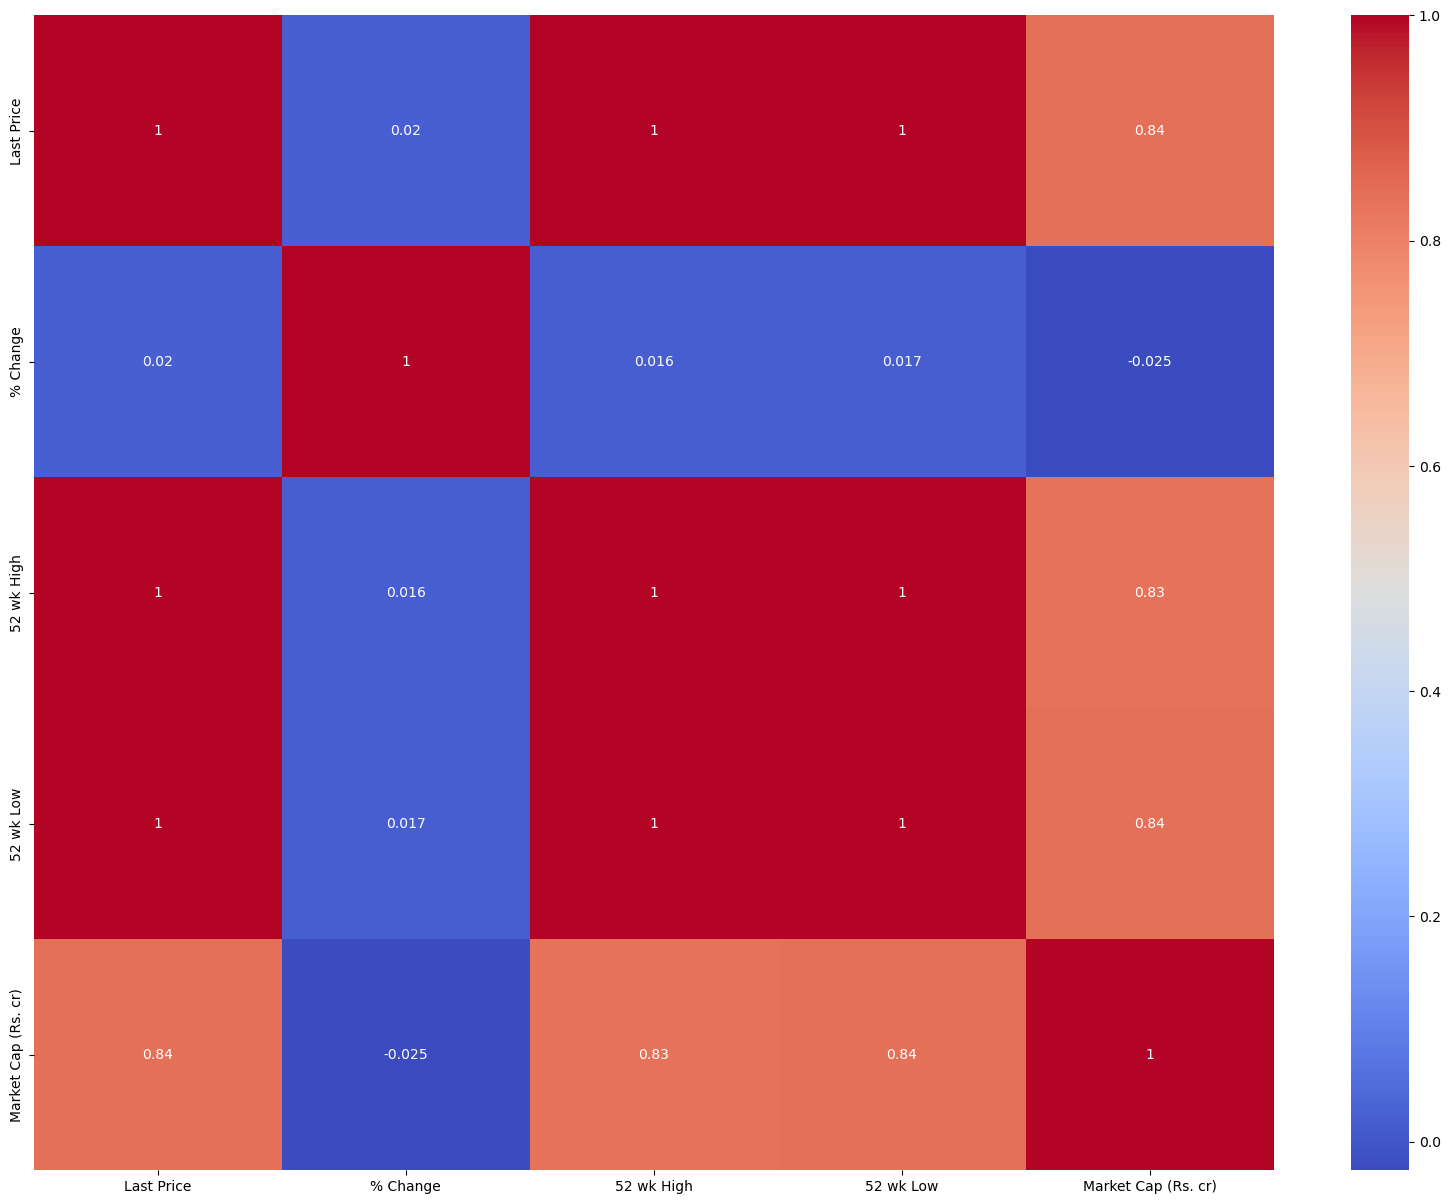

In [27]:
#correlation among all the features of this dataset:
print(df.corr())
plt.figure(figsize=(20, 15))
correlations = df.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()